# Aprendizaje automático y aplicaciones

---
$A^3$ @ FI-UNER : 2021

In [1]:
import numpy as np
import pandas as pd
#import modin.pandas as pd  # Alternativa paralelizada a Pandas

import matplotlib.pyplot as plt

<div style='background-color:#51B91A;padding:10px'>
<h1 style='color:#000000'><b>Preprocesamiento de tablas de datos</b></h1>
</div>

**Para revisar**: [Herramientas de preprocesamiento](https://scikit-learn.org/stable/data_transforms.html)

<h2>Operaciones frecuentes</h2>

- [Lectura de datos](#Lectura-de-datos)
- [Corrección de tipos de datos](#Corrección-de-tipos-de-datos)
- [Análisis exploratorio](#Análisis-exploratorio)
- [Graficación](#Graficación)
- [Manejo de datos faltantes](#Manejo-de-datos-faltantes)
- [Transformación de datos](#Transformación-de-datos)

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Lectura de datos</b></h2>
</div>

## Otras opciones

*Manejo de grandes datasets*: [notebook](https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets)

In [2]:
df = pd.read_csv('iris_NA.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,NaN,3.4,5.4,2.3,Virginica


<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Corrección de tipos de datos</b></h1>
</div>

In [3]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [4]:
df['variety'] = df['variety'].astype('category')

print(df.dtypes)

df

sepal.length     float64
sepal.width      float64
petal.length     float64
petal.width      float64
variety         category
dtype: object


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,NaN,3.4,5.4,2.3,Virginica


<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Análisis exploratorio (EDA)</b></h2>
</div>

### Otras opciones

Automatic EDA Libraries Comparisson: [notebook](https://www.kaggle.com/andreshg/automatic-eda-libraries-comparisson/notebook)

In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,147.000000,149.000000,149.000000,148.000000
mean,5.848980,3.059060,3.748993,1.204054
std,0.832916,0.436821,1.767791,0.762548
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info() # TODOS (150) DEBERIAN SER "NON-NULL"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  147 non-null    float64 
 1   sepal.width   149 non-null    float64 
 2   petal.length  149 non-null    float64 
 3   petal.width   148 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [7]:
#!pip3.6 install --user pandas-profiling[notebook]

In [8]:
# PROFILER AUTOMATICO
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Codificación de variables categóricas</b></h1>
</div>

In [10]:
df.columns

## PANDAS
x = df.variety.replace(to_replace=list(set(df.variety)),
                       value=[0,1,2],
                       inplace=False  # True lo aplica directamente en el dataset
                      )
x

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: variety, Length: 150, dtype: int64

In [11]:
from sklearn import preprocessing

In [12]:
# ORDINAL ENCODING
enc_ord = preprocessing.OrdinalEncoder()

cat_variables =[[x] for x in df.variety]  # Debe ser un vector columna

enc_ord.fit(cat_variables)

df_ord_enc = enc_ord.transform(cat_variables)

In [13]:
pd.DataFrame(df_ord_enc.flatten().astype(int), columns=['variety'])

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
# VARIABLES DUMMY
cat_variables = df.variety  # Extraigo variables categóricas
print(cat_variables)

print('\n--------------\n')

cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
print(cat_dummies)

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: category
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

--------------

     Versicolor  Virginica
0             0          0
1             0          0
2             0          0
3             0          0
4             0          0
..          ...        ...
145           0          1
146           0          1
147           0          1
148           0          1
149           0          1

[150 rows x 2 columns]


In [15]:
# ONE-HOT ENCODING
enc_onehot = preprocessing.OneHotEncoder()

cat_variables =[[x] for x in df['variety']]

enc_onehot.fit(cat_variables);

df_onehot_enc = enc_onehot.transform(cat_variables)

In [16]:
print(df_onehot_enc.toarray())

#pd.DataFrame(df_onehot_enc.toarray().astype(int), columns=list(set(df['variety'])))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Graficación</b></h1>
</div>

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [29]:
df = pd.read_csv('iris.csv')

X = df.iloc[:,:4]
y = df.iloc[:,4]

target_names = list(set(y))
target_names

[y == target_name, 0]

[0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 145    False
 146    False
 147    False
 148    False
 149    False
 Name: variety, Length: 150, dtype: bool,
 0]

In [18]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### PAIRPLOT

In [19]:
import seaborn as sns

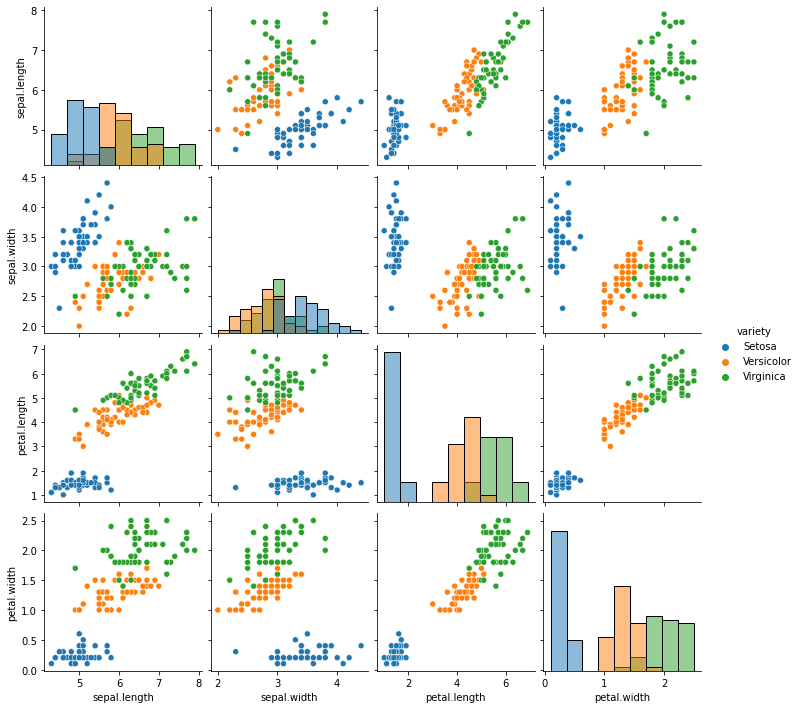

In [20]:
sns.pairplot(df,
             hue="variety",
             diag_kind="hist");

## PROYECCIONES
### PCA vs LDA

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)  # Usa información de las clases

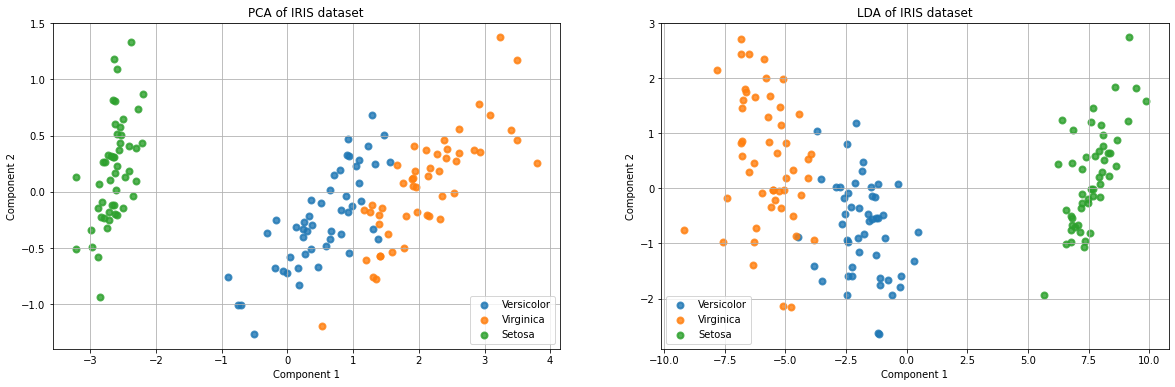

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

for i, target_name in enumerate(target_names):
    ax[0].scatter(X_pca[y == target_name, 0],
                  X_pca[y == target_name, 1],
                  color=f'C{i}',
                  alpha=.8,
                  lw=2,
                  label=target_name)

ax[0].grid(True)

ax[0].legend(loc='best',
             shadow=False,
             scatterpoints=1)

ax[0].set_title('PCA of IRIS dataset')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

#--------------

for i, target_name in enumerate(target_names):
    ax[1].scatter(X_lda[y == target_name, 0],
                  X_lda[y == target_name, 1],
                  color=f'C{i}',
                  alpha=.8,
                  lw=2,
                  label=target_name)

ax[1].grid(True)

ax[1].legend(loc='best',
             shadow=False,
             scatterpoints=1)

ax[1].set_title('LDA of IRIS dataset')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')


plt.show()

### Locally Linear Embedding (LLE)

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

embedding = LLE(n_components=2)
X_lle = embedding.fit_transform(X)

In [ ]:
X_lle.shape

### UMAP

https://umap-learn.readthedocs.io/en/latest/

In [ ]:
# !pip install umap-learn

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

X_umap = reducer.fit_transform(X)

In [ ]:
X_umap.shape

### PLOT LLE vs UMAP

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

for i, target_name in enumerate(target_names):
    ax[0].scatter(X_lle[y == target_name, 0],
                  X_lle[y == target_name, 1],
                  color=f'C{i}',
                  alpha=.8,
                  lw=2,
                  label=target_name)

ax[0].grid(True)

ax[0].legend(loc='best',
             shadow=False,
             scatterpoints=1)

ax[0].set_title('LLE of IRIS dataset')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

#------

for i, target_name in enumerate(target_names):
    ax[1].scatter(X_umap[y == target_name, 0],
                  X_umap[y == target_name, 1],
                  color=f'C{i}',
                  alpha=.8,
                  lw=2,
                  label=target_name)

ax[1].grid(True)

ax[1].legend(loc='best',
             shadow=False,
             scatterpoints=1)

ax[1].set_title('UMAP of IRIS dataset')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2');

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Manejo de datos faltantes</b></h1>
</div>

## PANDAS

In [ ]:
df = pd.read_csv('iris_NA.csv')

**Filling missing values: fillna**

In [ ]:
print(df['sepal.length'].isna().sum())

In [ ]:
#print(df['sepal.length'].fillna(0, inplace=False).to_string())  # Filling with "0"
print(df.fillna(df.mean(skipna=True), inplace=False).to_string())  # Filling with MEAN

#print(df['sepal.length'].isna().sum())

#print(df.to_string())

**Using** `replace()`

In [ ]:
#print(df.replace(np.nan, 0, inplace=False).to_string())

**Fill gaps forward** *(pad)* or **backward** *(bfill)*

In [ ]:
print(df['sepal.length'].isna().sum())

#print(df['sepal.length'].ffill(inplace=False).to_string())  # FORWARD

#print(df['sepal.length'].fillna(method='pad', inplace=False).to_string())  # <--- Equivalente al de arriba

#print(df['sepal.length'].bfill(inplace=False).to_string())  # BACKWARD

#print(df['sepal.length'].isna().sum())
#print(df.to_string())

**Dropping axis labels with missing data: dropna**

In [ ]:
#df.dropna(axis=0, inplace=False)

**Interpolation¶**

In [ ]:
#df.interpolate(inplace=False)
#df.interpolate(method='spline', order=2, inplace=False)
#df.interpolate(method='polynomial', order=2, inplace=False)

## Usando sklearn

https://scikit-learn.org/stable/modules/impute.html

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

**Univariate imputation**

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                    strategy='constant' #'mean'  # most_frequent", "constant"
                   )

imp.fit(df)  # "Entreno el imputador"

In [ ]:
# REALIZO IMPUTACION
df_imputed = imp.transform(df)

pd.DataFrame(df_imputed, columns=df.columns)

**Multivariate imputation**

In [ ]:
# EXPERIMENTAL
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10,
                       random_state=0)

df.variety.replace(to_replace=list(set(df.variety)),
                   value=[0,1,2],
                   inplace=True  # True lo aplica directamente en el dataset
                   )

imp.fit(df) # "Entreno el imputador"

In [ ]:
print(df.iloc[44,:])

print('\n-------------------\n')

# REALIZO IMPUTACION
df_imputed = imp.transform(df)

x = pd.DataFrame(df_imputed, columns=df.columns)
print(x.iloc[44,:])

**KNN imputation**

In [ ]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=2,
                 weights="uniform")

imp.fit(df) # "Entreno el imputador"

# REALIZO IMPUTACION
df_imputed = imp.transform(df)

x = pd.DataFrame(df_imputed, columns=df.columns)

print(df.iloc[44,0],x.iloc[44,0])

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Transformación de datos</b></h1>
</div>

https://scikit-learn.org/stable/modules/preprocessing.html

Comparación de scalers: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [ ]:
df = pd.read_csv('iris.csv')

df.variety.replace(to_replace=list(set(df.variety)),
                   value=[0,1,2],
                   inplace=True  # True lo aplica directamente en el dataset
                   )

In [ ]:
from sklearn import preprocessing

**StandardScaler**

In [ ]:
scaler = preprocessing.StandardScaler(with_mean=False,
                                      with_std=False).fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
df_scaled

**MinMaxScaler**

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
df_scaled

**MaxAbsScaler**

In [ ]:
scaler = preprocessing.MaxAbsScaler()

scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
df_scaled

**Normalizer**

In [ ]:
df

In [ ]:
df_normalized = preprocessing.normalize(df.iloc[:,:-1], axis=1, norm='l2')

df_normalized = pd.DataFrame(df_normalized, columns=df.columns[:-1])

In [ ]:
np.sum(df_normalized.iloc[0,:]**2)

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Generación de nuevas features</b></h2>
</div>

- Cálculo del índice de masa corporal
- Cociente de features
- ...

In [ ]:
df_scaled['sepal.ratio'] = df_scaled['sepal.length']/df_scaled['sepal.width']
df_scaled

In [ ]:
#df_scaled = df_scaled.reindex(sorted(df_scaled.columns), axis=1)
df_scaled2 = df_scaled.reindex(['petal.length',
                                'petal.width',
                                'sepal.length',
                                'sepal.width',
                                'sepal.ratio',
                                'variety'], axis=1)

df_scaled2

### Features polinómicas

https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features

- interaction_only=False $\longrightarrow (X_{1},X_{2}) \rightarrow (X_{1}, X_{2}, X_{1}^{2}, X_{1}X_{2}, X_{2}^{2}) $

- interaction_only=True  $\longrightarrow (X_{1},X_{2}) \rightarrow (X_{1}, X_{2}, X_{1}X_{2}) $

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = np.arange(6).reshape(3, 2)
X

In [ ]:
poly = PolynomialFeatures(2, interaction_only=False)
poly.fit_transform(X)

<div style='background-color:#ABE18F;padding:10px'>
<h2 style='color:#000000'><b>Selección de características</b></h2>
</div>

### sklearn

https://scikit-learn.org/stable/modules/feature_selection.html

---

**Univariate feature selection**

*Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.*

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X.shape

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # mutual_info_classif

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

---

**RFE**: *Feature ranking with recursive feature elimination.*

*Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.*

**This use a supervised learning estimator with a fit method that provides information about feature importance (e.g. coef_, feature_importances_).**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

In [ ]:
selector.support_

In [ ]:
selector.ranking_

---

**Sequential Feature Selection**: *Transformer that performs Sequential Feature Selection.* (v. 0.24+)

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

knn = KNeighborsClassifier(n_neighbors=3)

sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

In [ ]:
sfs.get_support()

In [ ]:
sfs.transform(X).shape

---

### mlxtend

http://rasbt.github.io/mlxtend/

In [ ]:
#!pip install mlxtend

*Sequential feature selection*: [ejemplos](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector)

**Visual illustration of the sequential backward selection process**

![ejemplo](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector_files/sbs-gpcr2020.png)